In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.optimize import minimize
import scipy.special as sp

TETA = 1
n_tup = (5, 10, 20, 50, 100)

In [9]:
#def likehood(x, sample):
#    L = 0
#    for i in range(sample[len(sample)-1]):
#        L =+ (sample[i] - x)**2
#    return L
#def space(x, sample):
#    space = 1
#    sample_c = sample.copy()
#    sample.sort()
#    space =* sts.norm.cdf(sample[0], loc=x, scale=1) * (1 - sts.norm.cdf(sample[len(sample)], loc=x, scale=1))

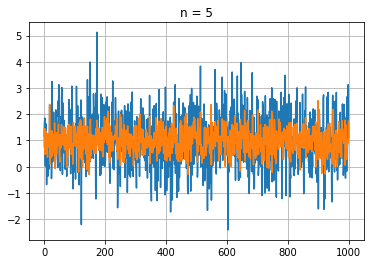

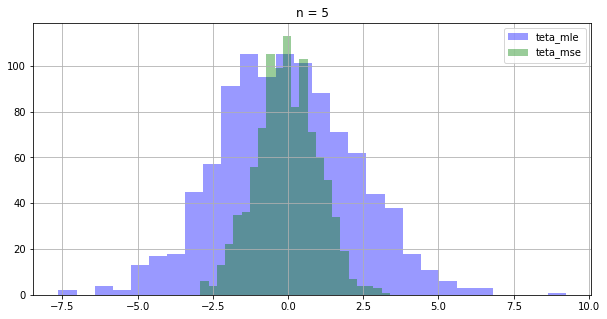

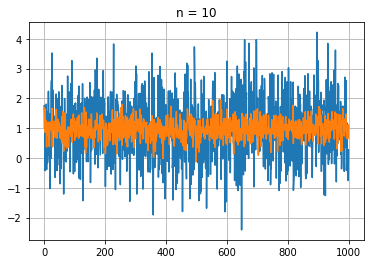

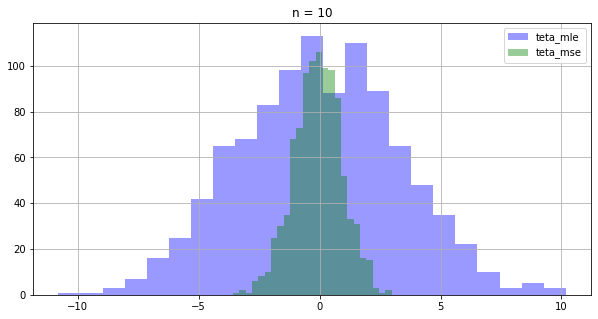

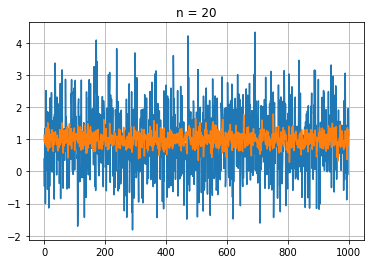

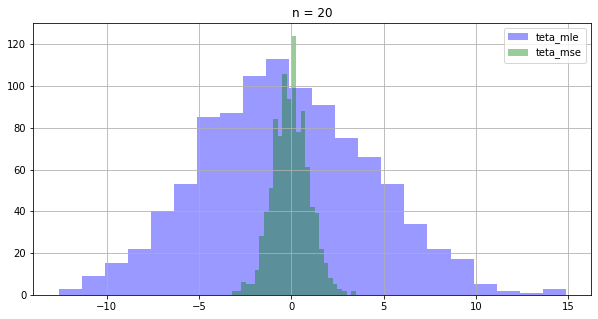

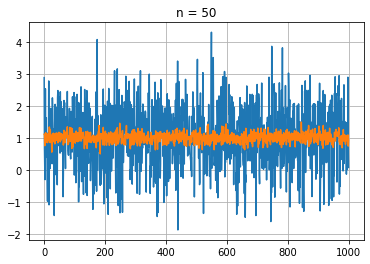

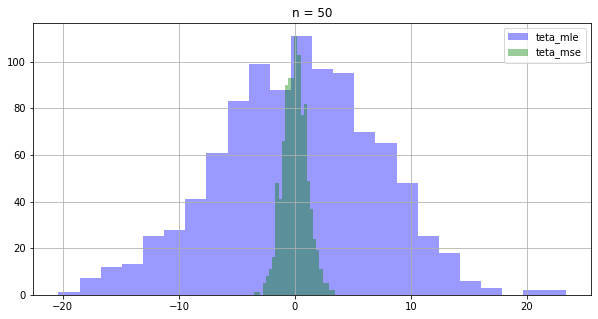

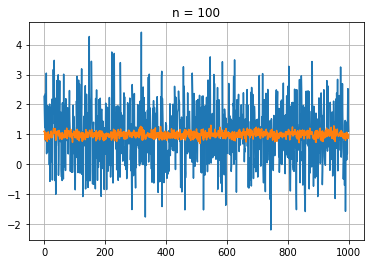

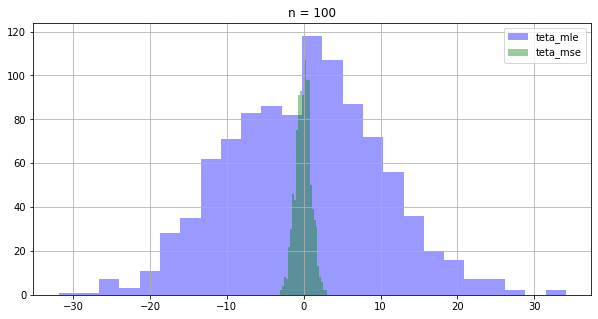

In [16]:
x0 = 1.0
for n in n_tup:
    def likehood(x, sample):
        L = 0
        for i in range(n):
            L =+ (sample[i] - x)**2
        return L
    
    def space(x, sample):
        s = 1
        sample.sort()
        s = s *(0.5 + 0.5*sp.erf((sample[0]-x)/((2)**(1/2)))) * (0.5 - 0.5*sp.erf((sample[n-1]-x)/((2)**(1/2))))
        for i in range(0, n-1):
            s = s * (0.5*sp.erf((sample[i+1]-x)/((2)**(1/2))) - 0.5*sp.erf((sample[i]-x)/((2)**(1/2))))
        return -s
    
    def space2(x, sample):
        s = 1
        sample.sort()
        s = s*(sts.norm.cdf(sample[0], loc=x, scale=1))*(1 - sts.norm.cdf(sample[n-1], loc=x, scale=1))
        for i in range(0, n-1):
            s = s*(sts.norm.cdf(sample[i+1], loc=x, scale=1) - sts.norm.cdf(sample[i], loc=x, scale=1))
        return -s
    
    teta_mle = []
    teta_mse = []
    for i in range(1000):
        sample = sts.norm.rvs(loc=TETA, scale=1, size=n)
#        sample = sample.tolist()
#        sample.append(n)
        res = minimize(likehood, x0, sample)
        teta_mle.append(res.x[0])
        res = []
        res = minimize(space, x0, sample, method='Nelder-Mead')
        teta_mse.append(res.x[0])
    teta_mle = np.array(teta_mle)
    teta_mse = np.array(teta_mse)
    plt.plot(teta_mle)
    plt.plot(teta_mse)
    plt.grid()
    plt.title('n = ' + str(n))
    plt.show()
    #построим гисторграммы, сравним разбросы 
    plt.figure(figsize=(10,5))
    sns.distplot((n)**(1/2) * (teta_mle-TETA), kde=False, color='b', label='teta_mle')
    sns.distplot((n)**(1/2) * (teta_mse-TETA), kde=False, color='g', label='teta_mse')
    plt.grid()
    plt.title('n = ' + str(n))
    plt.legend()
    plt.show()

In [14]:
sample = sts.norm.rvs(loc=TETA, scale=1, size=100)
display(sts.norm.cdf(sample, loc=TETA, scale=1))
display(sts.norm.cdf(sample[56], loc=TETA, scale=1))

array([0.18484372, 0.37272253, 0.89019005, 0.97098576, 0.7833262 ,
       0.39489374, 0.46242426, 0.8213029 , 0.20081691, 0.85504448,
       0.54638222, 0.23309956, 0.40065899, 0.89526883, 0.37065866,
       0.29314415, 0.38028268, 0.99475863, 0.96257928, 0.90782578,
       0.94479706, 0.87500532, 0.91768189, 0.8090808 , 0.51306339,
       0.59513659, 0.27422385, 0.54556277, 0.47159972, 0.10061933,
       0.57319346, 0.09609889, 0.29785769, 0.30882402, 0.96216883,
       0.63538766, 0.13978474, 0.53730811, 0.31137177, 0.48019125,
       0.45249654, 0.74003421, 0.45581805, 0.37327437, 0.90656531,
       0.49694286, 0.05646498, 0.49470088, 0.27287767, 0.46732849,
       0.00740662, 0.92419956, 0.62461122, 0.82893279, 0.73964033,
       0.86325197, 0.30718683, 0.47336369, 0.56229295, 0.29701539,
       0.66029702, 0.71214002, 0.06693685, 0.90794851, 0.20433407,
       0.40049886, 0.02219049, 0.90841026, 0.95867807, 0.71620926,
       0.24623178, 0.7098438 , 0.40518434, 0.48616244, 0.46965

0.3071868294126002